# 예측 모델 실습

## auto-mpg.csv 데이터를 통해,  mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon),

cylinders,

engine displacement (cu. inches),

horsepower,

vehicle weight (lbs.),

time to accelerate from O to 60 mph (sec.),

model year (modulo 100),

origin of car (1. American, 2. European,3. Japanese).

Also provided are the car labels (types)

Missing data values are marked by series of question marks.

0. import

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

1.pd DataFrame만들기

In [149]:
auto_df = pd.read_csv('auto-mpg.csv')

In [3]:
auto_df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


분석하기

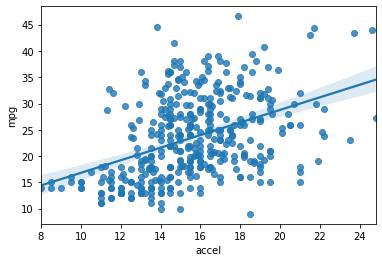

In [89]:
# 실린더와 mpg의 
sb.regplot(data=auto_df, x='accel', y='mpg')
plt.show()

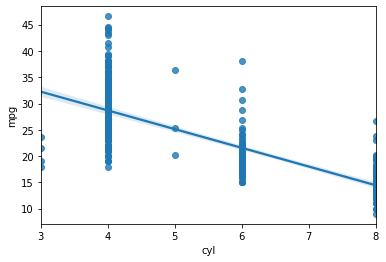

In [88]:
sb.regplot(data=auto_df, x='cyl', y='mpg')
plt.show()

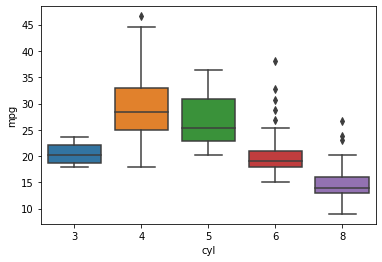

In [90]:
# 위처럼 겹쳐서 보이면 sb.boxplot() 이용한다
sb.boxplot(data=auto_df, x='cyl', y='mpg')
plt.show()

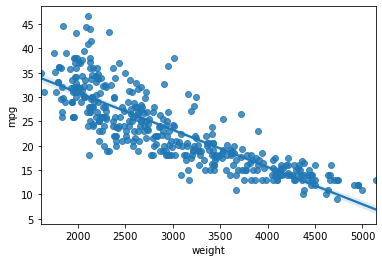

In [91]:
sb.regplot(data=auto_df, x='weight', y='mpg')
plt.show()

NaN 확인

In [6]:
auto_df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

data 가공

In [ ]:
# 컬럼 정보 :

# MPG (miles per gallon),

# cylinders,

# engine displacement (cu. inches),

# horsepower,

# vehicle weight (lbs.),

# time to accelerate from O to 60 mph (sec.),

# model year (modulo 100),

# origin of car (1. American, 2. European,3. Japanese).

# Also provided are the car labels (types)

# Missing data values are marked by series of question marks.

In [18]:
auto_df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [150]:
X = auto_df.iloc[ : , 1: 7+1 ]

In [52]:
X.head(2)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1


In [151]:
y = auto_df['mpg']

In [153]:
y = y.values.reshape(-1, 1)

In [154]:
y.shape

(392, 1)

One Hot Encoding

In [32]:
from sklearn.compose import ColumnTransformer

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [155]:
Ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [6] ) ], remainder='passthrough' ) 

In [156]:
X = Ct.fit_transform(X)

3. Feature Scaling 이 linear regression에서는 할 필요가 없다

train_test_split하기

In [39]:
from sklearn.model_selection import train_test_split

In [157]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=5)

In [112]:
mm_train_X, mm_test_X, mm_train_y, mm_test_y = train_test_split(mm_resultX, y, test_size=0.2, random_state=5)

4. Linear Modeling

In [72]:
from sklearn.linear_model import LinearRegression

In [158]:
regressor = LinearRegression()

In [159]:
regressor.fit(train_X, train_y)

LinearRegression()

In [160]:
#co-effecient
# 컬럼에서 x에 해당하는 컬럼을 채우고 나머지 미지수를 찾은 것을  보여줌
# y= ax +bx
regressor.coef_

array([[-1.8768072 ,  0.58320547,  1.29360173, -0.6494146 ,  0.02833031,
        -0.01435855, -0.00672104,  0.16438138,  0.71110944]])

In [161]:
regressor.intercept_

array([-13.04158006])

In [162]:
pred_y = regressor.predict(test_X)

In [163]:
# 성능 테스트
regressor.score(test_X, test_y)

0.7769674515212358

In [139]:
error_result = test_y - pred_y

실습2

In [ ]:
# linear regression

In [201]:
df = pd.read_csv('auto-mpg2.csv')

In [168]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


문자열 바꾸기 3가지 방법

In [ ]:
#문자열 확인하기 
# 1번째방법: unique() 확인해보면 숫자가 ''묶여 있음 
# 그중에 '?' 있음
df['horsepower'].unique()


str.isdigit() 숫자인지 확인

In [ ]:
#2번째 방법 str.isdigit() 으로 확인
df.loc [ df['horsepower'].str.isdigit() == False , ]

In [ ]:
#2번째 방법 이어서 replace()로도 NaN데이터로 바꿔 줄 수 있음
df['horsepower'] = df['horsepower'].replace('?', np.nan )

pd.to_numeric( df[바꿀컬럼], errors='coerce') 에러없이 숫자 바꾸기

In [ ]:
#3번째 방법, 숫자로 변환과 NaN 데이터로 바꿔주는게 한번에 가능해서 편하다
#pd.to_numeric() 함수를 활용
# errors= 파라미터를 안 넣으면 문자열 '?' 때문에 에러가 남
# errors='coerce' 를 넘기면
# 숫자로 변경하면 변경 못하는 것들을 NaN 으로 바꿔줌

pd.to_numeric( df['horsepower'], errors= 'coerce')

In [202]:
df.loc[ df['horsepower'] == '?' , 'horsepower'] = np.nan

In [203]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

삭제전략 dropna()/fillna()

In [ ]:
#삭제 전략 1 dropna()

In [205]:
df = df.dropna()

In [ ]:
#삭제 전략 2 -fillna()
# 평균값으로 넣기

In [ ]:
df.fillna(df.mean())

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [211]:
df['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 392, dtype: object

In [212]:
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [214]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [219]:
newX = df.iloc[ :, 1: -1]

In [225]:
new_y = df.iloc[:, 0]

In [222]:
from sklearn.compose import ColumnTransformer

In [223]:
from sklearn.preprocessing import OneHotEncoder

In [224]:
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [6] ) ], remainder='passthrough' )

In [226]:
newX = ct.fit_transform(newX)

In [227]:
from sklearn.model_selection import train_test_split

In [290]:
X_train, X_test, y_train, y_test = train_test_split(newX, new_y, test_size=0.2, random_state=10094)

In [288]:
# max = 0.95
# for random in range(1000, 6000):
#     X_train, X_test, y_train, y_test = train_test_split(newX, new_y, test_size=0.2, random_state=random)
#     regressor.fit(X_train, y_train)
#     score = regressor.score(X_test, y_test)
#     if max < score:
#         break


In [289]:
random

399999

In [277]:
from sklearn.linear_model import LinearRegression

In [291]:
regressor = LinearRegression()

In [292]:
regressor.fit(X_train, y_train)

LinearRegression()

In [293]:
new_pred_y = regressor.predict(X_test)

In [294]:
new_pred_y

array([20.56358647, 28.64029708, 16.51958496, 29.39044724, 28.99881763,
       23.91648967, 28.61480618, 28.70846327, 30.76354267, 12.58126278,
       27.76175905, 16.96492244, 15.06571326, 17.48660446, 32.76208117,
       13.14049855, 17.19832727, 29.7327547 , 26.47711719, 11.69030525,
       16.70137702, 33.57633769, 26.58598856, 33.23082178, 23.83889413,
       30.81773891, 12.21108381, 15.71882698, 33.29044312, 21.90676372,
       10.60321382, 28.84343001, 15.39957979, 15.85350273, 25.76765888,
       24.82419784, 10.73886167, 29.32876586, 23.75287479, 31.70959534,
       23.33964459,  8.35404458, 29.38770894, 27.05988717, 11.41624836,
       14.73694222, 13.30269929, 23.94554808, 36.31021829, 10.42136369,
       29.49864644, 33.50981077, 10.3476594 , 19.80673333, 26.67243212,
       34.48524843, 20.95740866, 20.38191218, 10.41784738, 32.60812894,
       25.56088147, 30.32434153, 12.01857787, 10.72936816, 22.65223319,
       30.54136522, 33.1059062 , 34.54469219, 12.45057799, 25.57

regressor.score(X_test, y_test)

In [295]:
# 남은 테스트용 X_test, 결과 테스트 y_test을 넘겨주면 스코어를 반환
regressor.score(X_test, y_test)

0.9027694918577589

In [296]:
result = pd.DataFrame( {'Actual': y_test, 'Predicted': new_pred_y})

In [247]:
result

,Actual,Predicted
240,30.5,30.093202
272,23.8,24.892449
215,13.0,17.841167
362,24.2,27.893539
58,25.0,23.340185
...,...,...
350,34.7,30.913457
134,16.0,17.599867
357,32.9,30.965024
179,22.0,23.722780


In [ ]:
# 참고사이트
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/